# Analysis of economic activity for different sectors : focus on the sector of hotels and restaurants  (London and Vancouver)

**Goal** : Check if we can see creation of jobs in one or a gain in term of economic activity

**Prior beliefs** : These two studies [Feddersen, A & Wolfgang Maennig (2013). ‘Mega-Events and Sector Employment : The case of the 1996 Olympic Games’. Contemporary Economic Policy. 31(3), 580-603] and [Baade, Baumann and Matheson (2008) ‘Slippery Slope? Assessing the Economic Impact of the 2002 Winter Olympic Games in Salt Lake City, Utah’ ] show respectively a creation of jobs in the hotel sector for Athlanta in 1996 and nothing in the other sectors, and a gain in tax revenues in the hotel sector (and restaurants) but loss for the other sectors in Salt Lake City in 2002.

**Expectations** : We expect to find a similar effect in London or Rio by analysis jobs and tax revenues in different sectors. But we will analyze also other sectors to 

**Case of London** : Results here are interesting when they are mixed with observations on different borough.

## 1 - London

**Facts** : London 2012  

- Date : 27 July to 12 August 2012

- Election : 6 July 2005


**Source of the dataset** : https://data.london.gov.uk/dataset/employment-industry-borough

In [147]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

df = pd.read_csv('London-employment-rate-by-industry-adjusted.csv', delimiter = ';')

In [149]:
df

,year,sector,area,value
0,2004,agr_fish,london,2400.0
1,2004,agr_fish,uk,271600.0
2,2004,ene_water,london,27900.0
3,2004,ene_water,uk,396700.0
4,2004,manu,london,195600.0
...,...,...,...,...
315,2019,pub_ed_hea,uk,9825200.0
316,2019,other,london,332100.0
317,2019,other,uk,1908000.0
318,2019,total,london,4122700.0


**Name of the sectors** : 

agr_fish = agriculture and fishing 

ene_water = energy and water

manu = manufacturing 

const = construction 

dist_hot_rest = distribution, hotels and restaurants 

tran_com = transport and communications

bank_fin_ins =  banking, finance and insurance

pub_ed_hea = public admin., education and health 

other = other services 

total = total services 


**Remark** : Hotels and restaurants are mixed with distribution. 

In [150]:
df_sector = df.groupby(['sector','year','area']).sum()

In [151]:
df_sector

value
sector   year area             
agr_fish 2004 london     2400.0
              uk       271600.0
         2005 london     2500.0
              uk       277900.0
         2006 london     3500.0
...                         ...
tran_com 2017 uk      2856200.0
         2018 london   565000.0
              uk      2896500.0
         2019 london   571500.0
              uk      2961600.0

[320 rows x 1 columns]

***i) Focus on Hotel, restaurants and distribution***

In [138]:
df_hot = df[df['sector'] == 'dist_hot_rest']

df_hot #Hotel, restaurant, distribution

,year,sector,area,value
8,2004,dist_hot_rest,london,623200.0
9,2004,dist_hot_rest,uk,5434200.0
28,2005,dist_hot_rest,london,602700.0
29,2005,dist_hot_rest,uk,5437000.0
48,2006,dist_hot_rest,london,588300.0
49,2006,dist_hot_rest,uk,5433100.0
68,2007,dist_hot_rest,london,586200.0
69,2007,dist_hot_rest,uk,5432600.0
88,2008,dist_hot_rest,london,617700.0
89,2008,dist_hot_rest,uk,5508700.0


In [139]:
df_hot_london = df_hot[df_hot['area'] == 'london']

df_hot_london

,year,sector,area,value
8,2004,dist_hot_rest,london,623200.0
28,2005,dist_hot_rest,london,602700.0
48,2006,dist_hot_rest,london,588300.0
68,2007,dist_hot_rest,london,586200.0
88,2008,dist_hot_rest,london,617700.0
108,2009,dist_hot_rest,london,608500.0
128,2010,dist_hot_rest,london,655100.0
148,2011,dist_hot_rest,london,646000.0
168,2012,dist_hot_rest,london,639400.0
188,2013,dist_hot_rest,london,660800.0


In [140]:
df_hot_uk = df_hot[df_hot['area'] == 'uk']

df_hot_uk

,year,sector,area,value
9,2004,dist_hot_rest,uk,5434200.0
29,2005,dist_hot_rest,uk,5437000.0
49,2006,dist_hot_rest,uk,5433100.0
69,2007,dist_hot_rest,uk,5432600.0
89,2008,dist_hot_rest,uk,5508700.0
109,2009,dist_hot_rest,uk,5371100.0
129,2010,dist_hot_rest,uk,5360600.0
149,2011,dist_hot_rest,uk,5452700.0
169,2012,dist_hot_rest,uk,5455300.0
189,2013,dist_hot_rest,uk,5547300.0


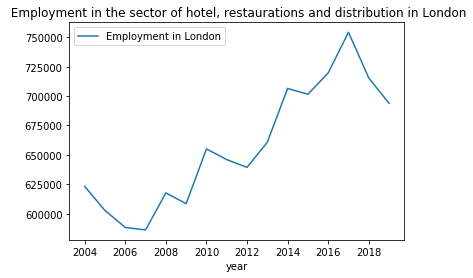

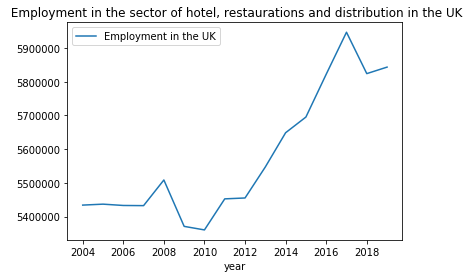

In [142]:
df_hot_london.plot(y='value',x='year', label = "Employment in London")

plt.title(" Employment in the sector of hotel, restaurations and distribution in London")

df_hot_uk.plot(y='value',x='year', label = "Employment in the UK")

plt.title(" Employment in the sector of hotel, restaurations and distribution in the UK")

plt.show()

**Comment** : Decrease in 2008 (economic crisis?) and incease after 2012 for both.

Decrease in employment in London from 2010 to 2012.

***ii/ Comparison with the other sectors (total)***

In [152]:
df_tot = df[df['sector'] == 'total']

df_tot

,year,sector,area,value
18,2004,total,london,2993900.0
19,2004,total,uk,21390900.0
38,2005,total,london,3038200.0
39,2005,total,uk,21782100.0
58,2006,total,london,3063400.0
59,2006,total,uk,22007500.0
78,2007,total,london,3095000.0
79,2007,total,uk,22256300.0
98,2008,total,london,3208900.0
99,2008,total,uk,22489100.0


In [153]:
df_tot_london = df_tot[df_tot['area'] == 'london']

df_tot_london

,year,sector,area,value
18,2004,total,london,2993900.0
38,2005,total,london,3038200.0
58,2006,total,london,3063400.0
78,2007,total,london,3095000.0
98,2008,total,london,3208900.0
118,2009,total,london,3301500.0
138,2010,total,london,3348100.0
158,2011,total,london,3394400.0
178,2012,total,london,3482800.0
198,2013,total,london,3567700.0


In [67]:
df_tot_uk = df_tot[df_tot['area'] == 'uk']

df_tot_uk

,year,sector,area,value
19,2004,total,uk,21390900.0
39,2005,total,uk,21782100.0
59,2006,total,uk,22007500.0
79,2007,total,uk,22256300.0
99,2008,total,uk,22489100.0
119,2009,total,uk,22813400.0
139,2010,total,uk,22948900.0
159,2011,total,uk,23100200.0
179,2012,total,uk,23342800.0
199,2013,total,uk,23711600.0


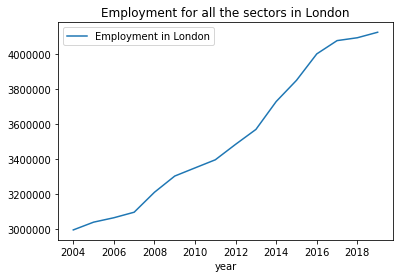

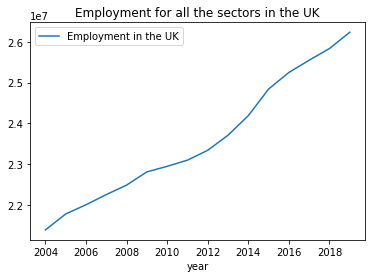

In [155]:
df_tot_london.plot(y='value',x='year', label = "Employment in London")

plt.title("Employment for all the sectors in London")

df_tot_uk.plot(y='value',x='year', label = "Employment in the UK")

plt.title("Employment for all the sectors in the UK")

plt.show()

***iii) Comparison of the variation*** 

Creation of a new dataset  with a new column variation for each sector and for London and the UK i.e :

$$v_{n,k, \delta} = \frac{X_{n,k,\delta} - X_{n-1,k,\delta}}{X_{n-1,k,\delta}}$$

Dataset : London-employment-rate-by-industry-adjusted-variation.csv

In [156]:
dfv = pd.read_csv('London-employment-rate-by-industry-adjusted-variation.csv', delimiter = ';')

dfv

,year,sector,area,value,variation
0,2004,agr_fish,london,2400,0.000000
1,2004,agr_fish,uk,271600,0.000000
2,2004,ene_water,london,27900,0.000000
3,2004,ene_water,uk,396700,0.000000
4,2004,manu,london,195600,0.000000
...,...,...,...,...,...
315,2019,pub_ed_hea,uk,9825200,0.020376
316,2019,other,london,332100,-0.024956
317,2019,other,uk,1908000,0.005057
318,2019,total,london,4122700,0.007675


In [53]:
dfv_sector_london = dfv[dfv['area'] =='london']

dfv_sector_london['sector'].unique()

array(['agr_fish', 'ene_water', 'manu', 'const', 'dist_hot_rest',
       'tran_com', 'bank_fin_ins', 'pub_ed_hea', 'other', 'total'],
      dtype=object)

**Comment** : We wanted to display without agriculture and fishing as this sector has had a lot of variations 

In [54]:
dfv_sector_london_2 = dfv_sector_london[dfv_sector_london.sector != 'agr_fish']

dfv_sector_london_2

,year,sector,area,value,variation
2,2004,ene_water,london,27900,0.000000
4,2004,manu,london,195600,0.000000
6,2004,const,london,256200,0.000000
8,2004,dist_hot_rest,london,623200,0.000000
10,2004,tran_com,london,485100,0.000000
...,...,...,...,...,...
310,2019,tran_com,london,571500,0.011504
312,2019,bank_fin_ins,london,1249400,0.010841
314,2019,pub_ed_hea,london,1275900,0.033703
316,2019,other,london,332100,-0.024956


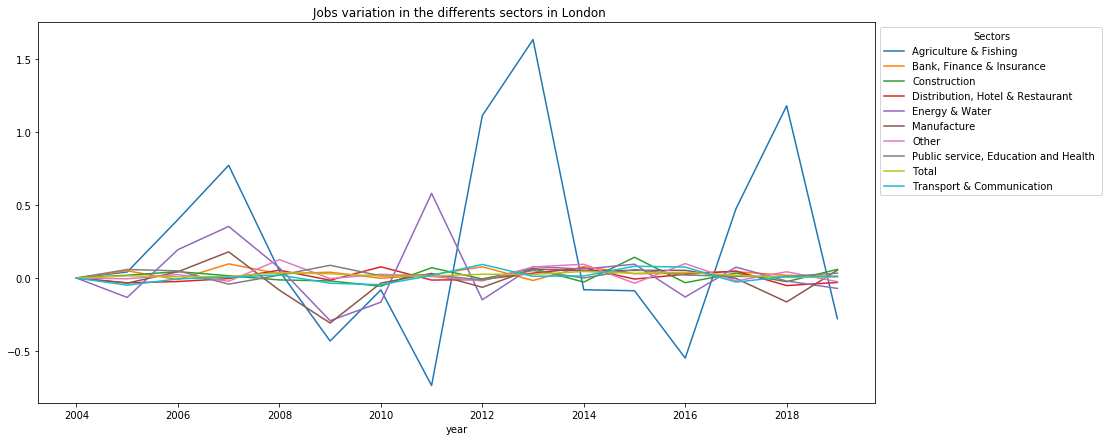

In [172]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
dfv_sector_london.groupby(['year','sector']).sum()['variation'].unstack().plot(ax=ax)

plt.legend(['Agriculture & Fishing','Bank, Finance & Insurance','Construction','Distribution, Hotel & Restaurant', 'Energy & Water', 'Manufacture',
        'Other' ,'Public service, Education and Health ','Total', 'Transport & Communication'], title = 'Sectors',bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes  )

plt.title(" Jobs variation in the differents sectors in London")

plt.draw()

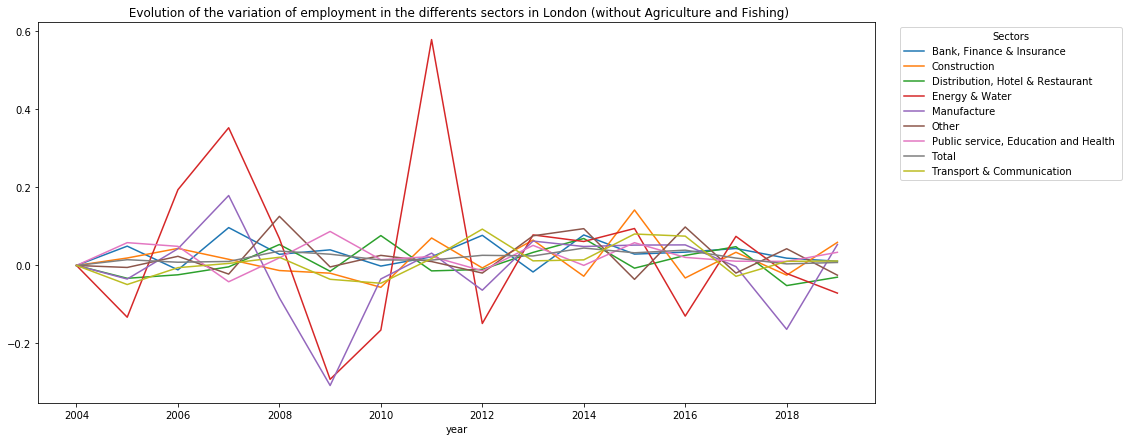

In [177]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
dfv_sector_london_2.groupby(['year','sector']).sum()['variation'].unstack().plot(ax=ax)

plt.legend(['Bank, Finance & Insurance','Construction','Distribution, Hotel & Restaurant', 'Energy & Water', 'Manufacture',
        'Other' ,'Public service, Education and Health ','Total', 'Transport & Communication'], title = 'Sectors',bbox_to_anchor=(1.3, 1), bbox_transform=ax.transAxes  )

plt.title(" Evolution of the variation of employment in the differents sectors in London (without Agriculture and Fishing)")

plt.draw()

In [165]:
dfv_sector_uk = dfv[dfv['area'] =='uk']

dfv_sector_uk

,year,sector,area,value,variation
1,2004,agr_fish,uk,271600,0.000000
3,2004,ene_water,uk,396700,0.000000
5,2004,manu,uk,3709900,0.000000
7,2004,const,uk,2386900,0.000000
9,2004,dist_hot_rest,uk,5434200,0.000000
...,...,...,...,...,...
311,2019,tran_com,uk,2961600,0.022475
313,2019,bank_fin_ins,uk,5696300,0.019454
315,2019,pub_ed_hea,uk,9825200,0.020376
317,2019,other,uk,1908000,0.005057


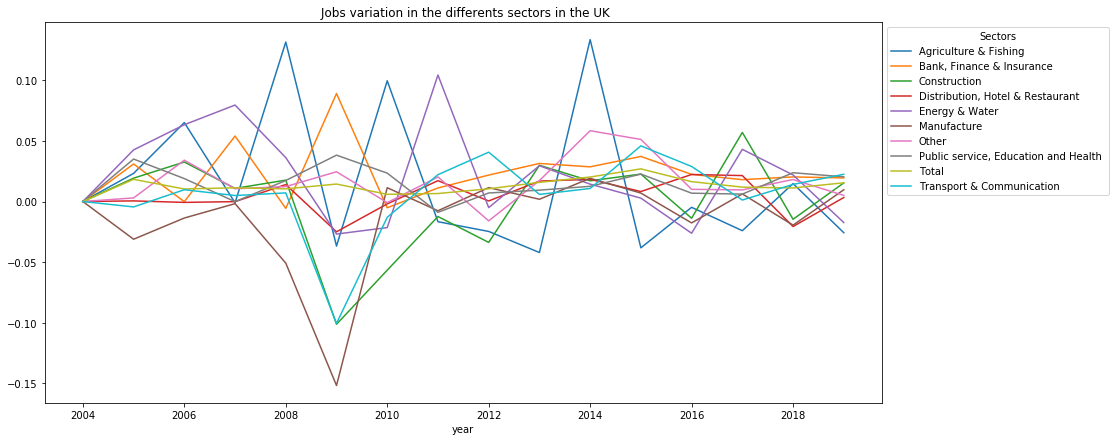

In [173]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
dfv_sector_uk.groupby(['year','sector']).sum()['variation'].unstack().plot(ax=ax)

plt.legend(['Agriculture & Fishing','Bank, Finance & Insurance','Construction','Distribution, Hotel & Restaurant', 'Energy & Water', 'Manufacture',
        'Other' ,'Public service, Education and Health ','Total', 'Transport & Communication'], title = 'Sectors',bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes  )

plt.title(" Evolution of the variation of employment in the differents sectors in the UK")

plt.draw()

***iv) Global observation of employment in the UK and in London for different sectors***

In [174]:
df_sector_london = df[df['area'] == 'london']

df_sector_london

,year,sector,area,value
0,2004,agr_fish,london,2400.0
2,2004,ene_water,london,27900.0
4,2004,manu,london,195600.0
6,2004,const,london,256200.0
8,2004,dist_hot_rest,london,623200.0
...,...,...,...,...
310,2019,tran_com,london,571500.0
312,2019,bank_fin_ins,london,1249400.0
314,2019,pub_ed_hea,london,1275900.0
316,2019,other,london,332100.0


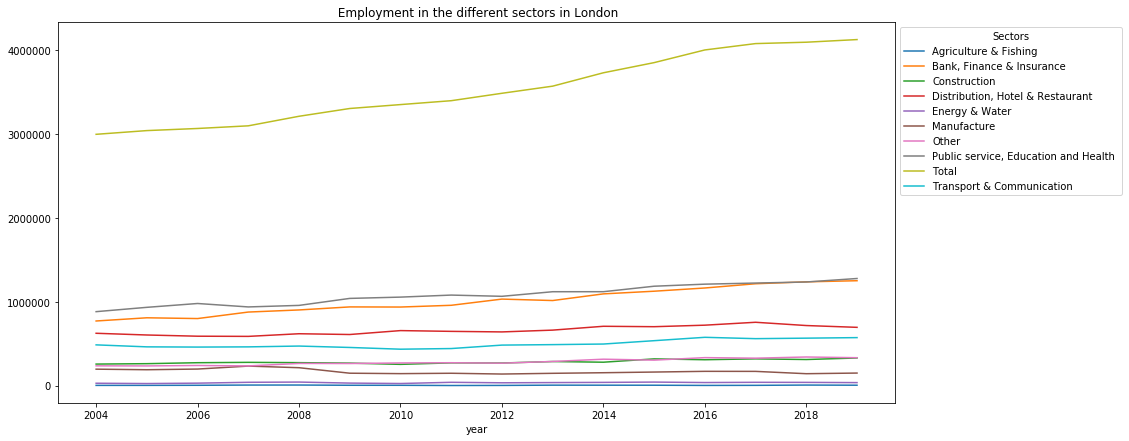

In [176]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_sector_london.groupby(['year','sector']).sum()['value'].unstack().plot(ax=ax)

plt.legend(['Agriculture & Fishing','Bank, Finance & Insurance','Construction','Distribution, Hotel & Restaurant', 'Energy & Water', 'Manufacture',
        'Other' ,'Public service, Education and Health ','Total', 'Transport & Communication'], title = 'Sectors',bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes  )

plt.title(" Employment in the different sectors in London")

plt.draw()

In [179]:
df_sector_uk = df[df['area'] == 'uk']

df_sector_uk

,year,sector,area,value
1,2004,agr_fish,uk,271600.0
3,2004,ene_water,uk,396700.0
5,2004,manu,uk,3709900.0
7,2004,const,uk,2386900.0
9,2004,dist_hot_rest,uk,5434200.0
...,...,...,...,...
311,2019,tran_com,uk,2961600.0
313,2019,bank_fin_ins,uk,5696300.0
315,2019,pub_ed_hea,uk,9825200.0
317,2019,other,uk,1908000.0


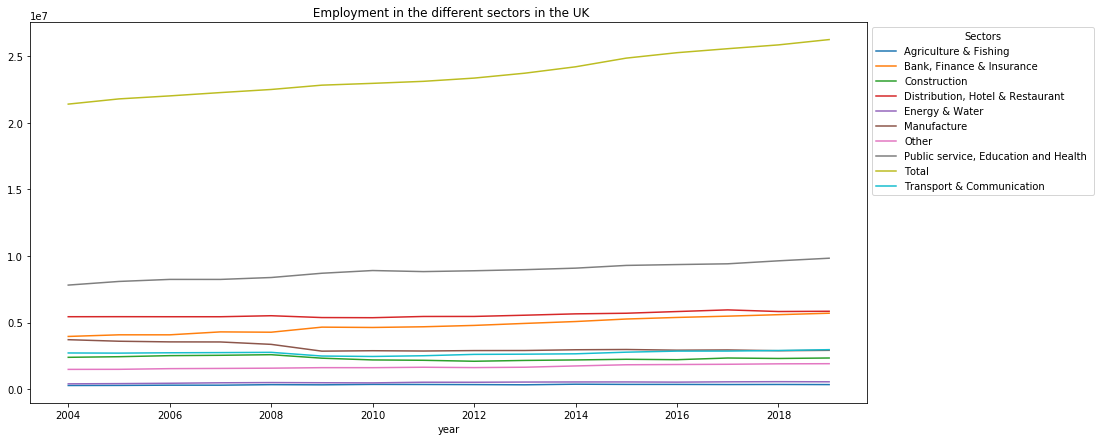

In [180]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_sector_uk.groupby(['year','sector']).sum()['value'].unstack().plot(ax=ax)

plt.legend(['Agriculture & Fishing','Bank, Finance & Insurance','Construction','Distribution, Hotel & Restaurant', 'Energy & Water', 'Manufacture',
        'Other' ,'Public service, Education and Health ','Total', 'Transport & Communication'], title = 'Sectors',bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes  )

plt.title(" Employment in the different sectors in the UK")

plt.draw()

**Restaurants unit by borough**

Source : https://data.london.gov.uk/dataset/pubs-clubs-restaurants-takeaways-borough

Si temps essayer de regarder pour le nombre de restaurants par Borough + mettre en parallèle avec analyse de Louis et Patrick.

In [181]:
df2 = pd.read_csv('London_restaurants_unit_borough.csv', delimiter = ';')

In [182]:
df2

,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,London,5 455,5 525,5 540,5 575,5 915,5 940,6 175,5 985,5 910,6 175,6 210,6 655,6 715,7 035,7 515,7 745,7 990
1,City of London,180,190,190,175,180,170,205,185,180,195,190,205,230,255,270,270,295
2,Barking and Dagenham,30,30,30,35,35,35,35,35,30,30,30,40,40,35,45,40,35
3,Barnet,205,195,200,200,200,200,205,195,210,215,205,235,250,240,255,245,270
4,Bexley,85,80,75,80,85,95,95,95,90,95,95,105,105,105,100,110,110
5,Brent,120,125,130,120,125,145,155,140,145,150,155,165,170,165,185,200,190
6,Bromley,145,150,150,155,165,175,165,165,170,175,160,180,185,180,180,190,200
7,Camden,445,425,405,405,445,430,440,415,410,440,445,465,480,510,565,570,600
8,Croydon,145,150,160,155,165,170,175,160,160,155,170,165,155,155,175,185,205
9,Ealing,145,155,160,155,155,150,165,165,160,165,160,175,165,175,190,190,190


## 2 - Vancouver 

We will analyze the data we have for vancouver concerning employment by industry. The sector of tourism has been analyzed in another notebook.

**Goals** : Analyze the sector of "Accomodation and food" and compare with other industries. 

**Facts** :
- Election = 2nd July 2003 
- Date of OG : Winter 2010 (12 to 28 February)

Try to find other trends around 2010.

**Dataset** : Modification of the dataset given by Citadel 'vancouver_employment_by_industry'

In [107]:
df_vancouver_sector = pd.read_csv('vancouver_employment_by_industry_arrange.csv', delimiter = ';')

df_vancouver_sector

,year,industry,value
0,2000.0,All industries,1930800.0
1,2000.0,Goods-Producing Sector,407200.0
2,2000.0,Agriculture,29700.0
3,2000.0,Crop Production,16200.0
4,2000.0,Animal Production,10400.0
...,...,...,...
2815,2019.0,Private Households,10100.0
2816,2019.0,Public administration,116000.0
2817,2019.0,Federal Government Public Administration (i...,42700.0
2818,2019.0,Provincial and Territorial Public Administr...,35400.0


In [108]:
df_vancouver_all = df_vancouver_sector[df_vancouver_sector['industry'] == 'All industries']

df_vancouver_all

,year,industry,value
0,2000.0,All industries,1930800.0
141,2001.0,All industries,1920900.0
282,2002.0,All industries,1952400.0
423,2003.0,All industries,1998100.0
564,2004.0,All industries,2028300.0
705,2005.0,All industries,2089700.0
846,2006.0,All industries,2140800.0
987,2007.0,All industries,2206000.0
1128,2008.0,All industries,2241900.0
1269,2009.0,All industries,2191900.0


Text(0.5, 1.0, 'Evolution of the employment for all industries')

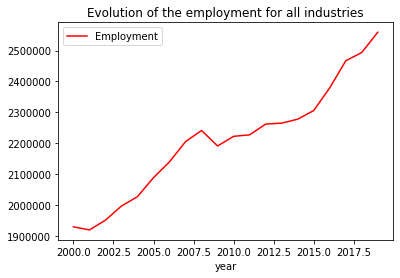

In [183]:
df_vancouver_all.plot(x='year', y='value', c='red', label ="Employment")

plt.title("Evolution of the employment for all industries")

**Comments** : Economic crisis 2008 (decrease and decrease of the variation). Slope 2009-2012 after the crisis. Slope 2011-2012 : Olympic Games ? 

Analysis on "Accomodation and food services"

In [184]:
df_vancouver_food_acc =df_vancouver_sector[df_vancouver_sector['industry'] == 'Accommodation and food services']

df_vancouver_food_acc

,year,industry,value
129,2000.0,Accommodation and food services,155600.0
270,2001.0,Accommodation and food services,164000.0
411,2002.0,Accommodation and food services,163000.0
552,2003.0,Accommodation and food services,159100.0
693,2004.0,Accommodation and food services,170000.0
834,2005.0,Accommodation and food services,171700.0
975,2006.0,Accommodation and food services,167400.0
1116,2007.0,Accommodation and food services,168700.0
1257,2008.0,Accommodation and food services,170600.0
1398,2009.0,Accommodation and food services,170800.0


Text(0.5, 1.0, 'Evolution of the employment for Accomodation and Food services ')

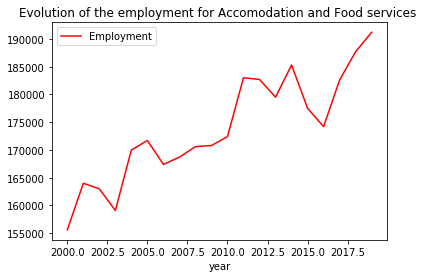

In [186]:
df_vancouver_food_acc.plot(x='year', y='value', c='red', label = "Employment")

plt.title("Evolution of the employment for Accomodation and Food services ")

In [190]:
#'Accommodation and food services','All industries','Construction', 'Trade', 'Broadcasting and Telecommunications'

df_vancouver_selected_sector = df_vancouver_sector.loc[(df_vancouver_sector['industry'] =='All industries') | 
                                          (df_vancouver_sector['industry'] =='Accommodation and food services') |
                                          (df_vancouver_sector['industry'] =='Construction') |
                                          (df_vancouver_sector['industry'] =='Trade') |
                                          (df_vancouver_sector['industry'] =='Broadcasting and Telecommunications')]
        
        
        

df_vancouver_selected_sector

,year,industry,value
0,2000.0,All industries,1930800.0
15,2000.0,Construction,112100.0
54,2000.0,Trade,303600.0
129,2000.0,Accommodation and food services,155600.0
141,2001.0,All industries,1920900.0
...,...,...,...
2667,2018.0,Accommodation and food services,187700.0
2679,2019.0,All industries,2559000.0
2694,2019.0,Construction,236600.0
2733,2019.0,Trade,389200.0


In [191]:
df_vancouver_selected_sector.to_csv('vancouver_employment_selected_sector.csv')

In [199]:
df_vancouver_selected_sector_var = pd.read_csv('vancouver_employment_selected_sector_variation.csv', delimiter = ';')

df_vancouver_selected_sector_var

,year,industry,value,variation
0,2000,All industries,1930800.0,0.000000
1,2000,Construction,112100.0,0.000000
2,2000,Trade,303600.0,0.000000
3,2000,Accommodation and food services,155600.0,0.000000
4,2001,All industries,1920900.0,-0.005127
...,...,...,...,...
75,2018,Accommodation and food services,187700.0,0.027930
76,2019,All industries,2559000.0,0.026227
77,2019,Construction,236600.0,-0.007550
78,2019,Trade,389200.0,0.056460


In [203]:
#'Accommodation and food services',,'Construction', 'Trade'

df_vancouver_selected_sector_var2 = df_vancouver_selected_sector_var.loc[ (df_vancouver_selected_sector_var['industry'] =='Accommodation and food services') |
                                          (df_vancouver_selected_sector_var['industry'] =='Construction') |
                                          (df_vancouver_selected_sector_var['industry'] =='Trade')]
        
        
        

df_vancouver_selected_sector_var2

,year,industry,value,variation
1,2000,Construction,112100.0,0.000000
2,2000,Trade,303600.0,0.000000
3,2000,Accommodation and food services,155600.0,0.000000
5,2001,Construction,112300.0,0.001784
6,2001,Trade,303300.0,-0.000988
7,2001,Accommodation and food services,164000.0,0.053985
9,2002,Construction,116800.0,0.040071
10,2002,Trade,318500.0,0.050115
11,2002,Accommodation and food services,163000.0,-0.006098
13,2003,Construction,117600.0,0.006849


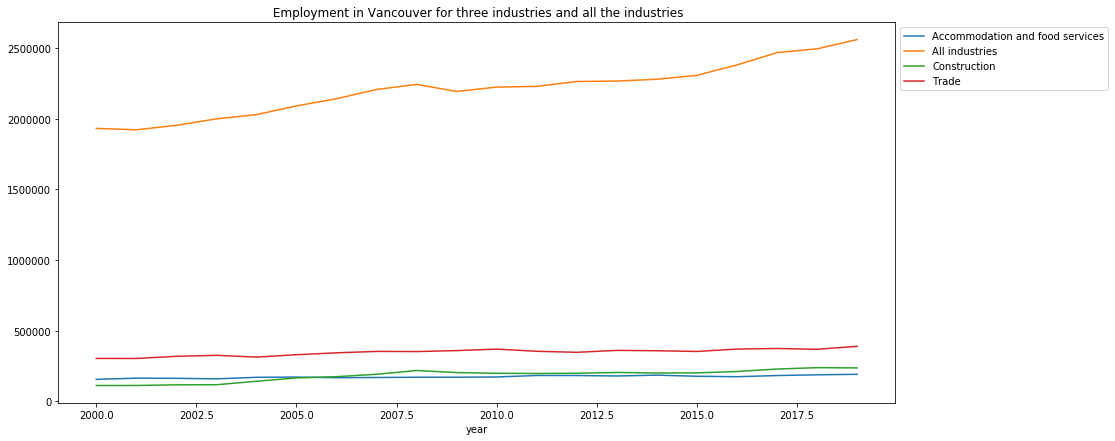

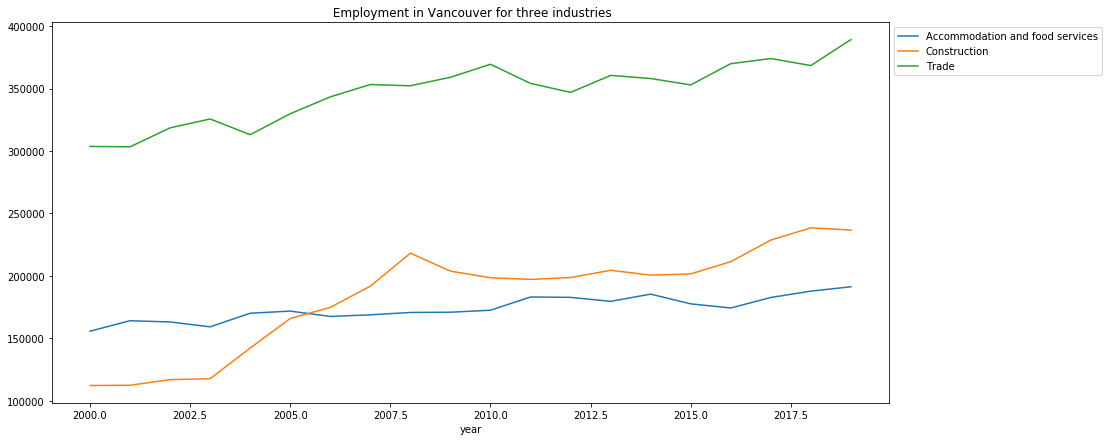

In [204]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_vancouver_selected_sector_var.groupby(['year','industry']).sum()['value'].unstack().plot(ax=ax)

plt.legend(title = 'Industries')

plt.legend(bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)

plt.title(" Employment in Vancouver for three industries and all the industries")

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_vancouver_selected_sector_var2.groupby(['year','industry']).sum()['value'].unstack().plot(ax=ax)

plt.legend(title = 'Industries')

plt.legend(bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)

plt.title(" Employment in Vancouver for three industries")


plt.draw()

Text(0.5, 1.0, ' Variation of employment in Vancouver for 3 industries and all')

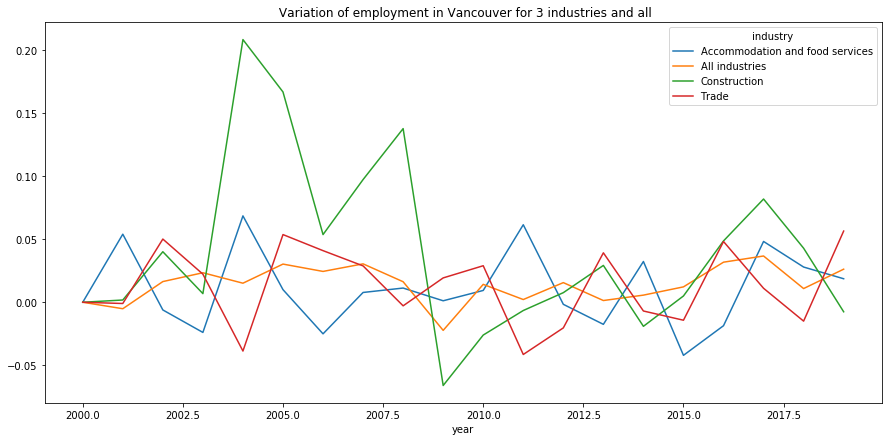

In [132]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_vancouver_selected_sector_var.groupby(['year','industry']).sum()['variation'].unstack().plot(ax=ax)

plt.title(" Variation of employment in Vancouver for 3 industries and all")